![](https://www.seriesanime.xyz/wp-content/uploads/2019/11/pulgar-arriba-naruto-480x270.jpg)

***
# Importes
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

***
# Hipotesis
***

¿Que factores estan mayormente relacionados con la ocurrencia de un accidente cardiovascular? ¿Puede la existencia de un accidente cerebrovascular conllevar a una paersona a sufrir de ataques al corazon?

***
# Abstract
***

Las enfermedades y los problemas del corazón afectan a una gran parte de la sociedad. Nos afectan a nosotros, ya sea de forma directa o a nuestros familiares y amigos. Un accidente cerebrovascular puede causar ocasionalmente discapacidades temporales o permanentes, según el tiempo que el cerebro permanezca sin flujo sanguíneo y la parte afectada.
Muchas estrategias de prevención de accidentes cerebrovasculares son las mismas que las estrategias de prevención de enfermedades cardíacas. Controlar la presión arterial alta, reducir la cantidad de colesterol y grasas saturadas en tu alimentación, hacer ejercicio de forma regular, evitar el alcohol y el tabaquismo entre otras recomendaciones para mantener un estilo de vida saludable.
Es escencial la detección temprana de los distintos signos de advertencia para evitar o minimizar un accidente cerebrovascular. Se busca detectar en un estadío temprano cualquier tipo de enfermedad por accidente cerebrovascular a través del uso de un modelo creado a partir de una base de datos de miles de personas con múltiples características para cada una. Este dataset pertenece al BRFSS 2015 (Behavioral Risk Factor Surveillance System).
Se utilizará una clasificación binaria durante este trabajo. 

***
# Analisis introductorio
***

In [2]:
url = 'https://raw.githubusercontent.com/Tomtechno/DataScience-Coder/main/heart_disease_health_indicators_BRFSS2015.csv?token=GHSAT0AAAAAABZIXNY35I43NJ2BCJG2S7EYY25QKGQ'
df = pd.read_csv(url)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
df.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [5]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [37]:
with pd.option_context("display.max_columns", None):display(df)

,target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Verificamos que no haya datos faltantes.

In [56]:
df.isna().sum()

target               0
HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

Por lo que se puede observar, no hay ningun dato faltante. Podemos seguir con el análisis.

In [61]:
print(df[df.Age>100])
print(df[df.Age<0])

#filtro = df["Age"]>100
#df.loc[filtro, "Age"] = df.loc[filtro, "Age"]/10
#df["Age"] = df["Age"].fillna(df["Age"].mean())

#df["Genero"] = df['Genero'].replace({'D': 'F', '?': 'X'})
#df["Genero"].value_counts()

Empty DataFrame
Columns: [target, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [target, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]
Index: []

[0 rows x 22 columns]


In [55]:
df.sum(axis = 0, skipna = True)

target                 23893.0
HighBP                108829.0
HighChol              107591.0
CholCheck             244210.0
BMI                  7200038.0
Smoker                112423.0
Stroke                 10292.0
Diabetes               75323.0
PhysActivity          191920.0
Fruits                160898.0
Veggies               205841.0
HvyAlcoholConsump      14256.0
AnyHealthcare         241263.0
NoDocbcCost            21354.0
GenHlth               637090.0
MentHlth              807913.0
PhysHlth             1076131.0
DiffWalk               42675.0
Sex                   111706.0
Age                  2037588.0
Education            1281194.0
Income               1535747.0
dtype: float64

In [7]:
features = ['target', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']

***
# Primer analisis de datos
***

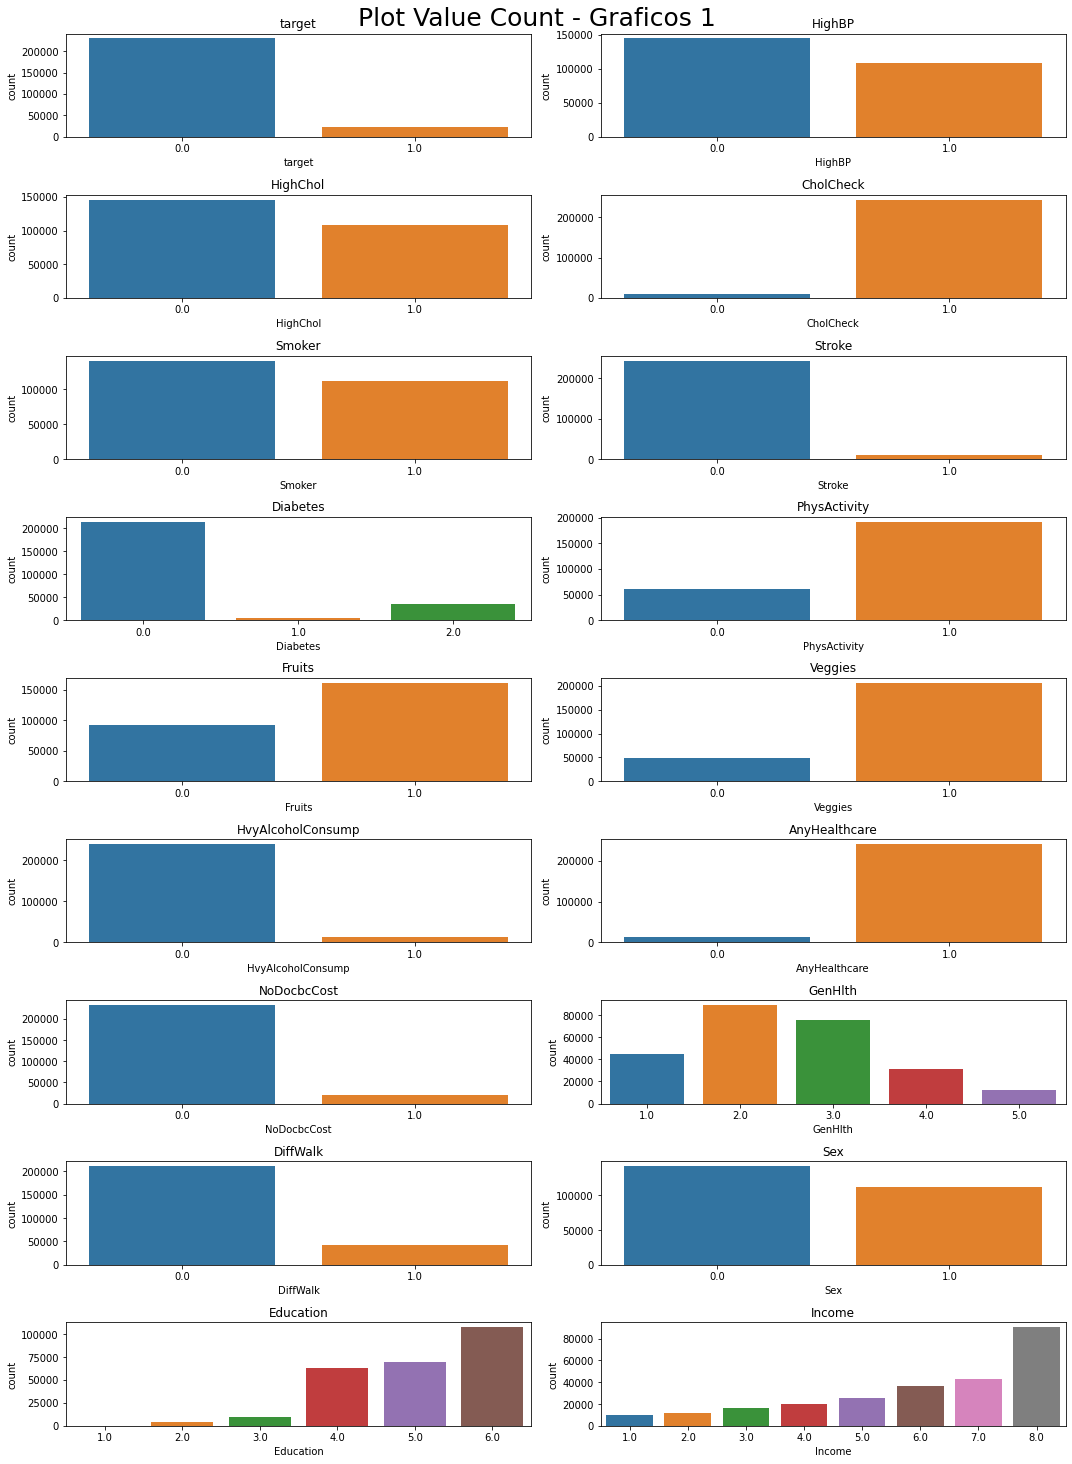

In [8]:
plt.figure(figsize=(15,40))
for i,column in enumerate(features):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Count - Graficos 1", fontsize=25, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

***
# Segundo analisis de datos
***

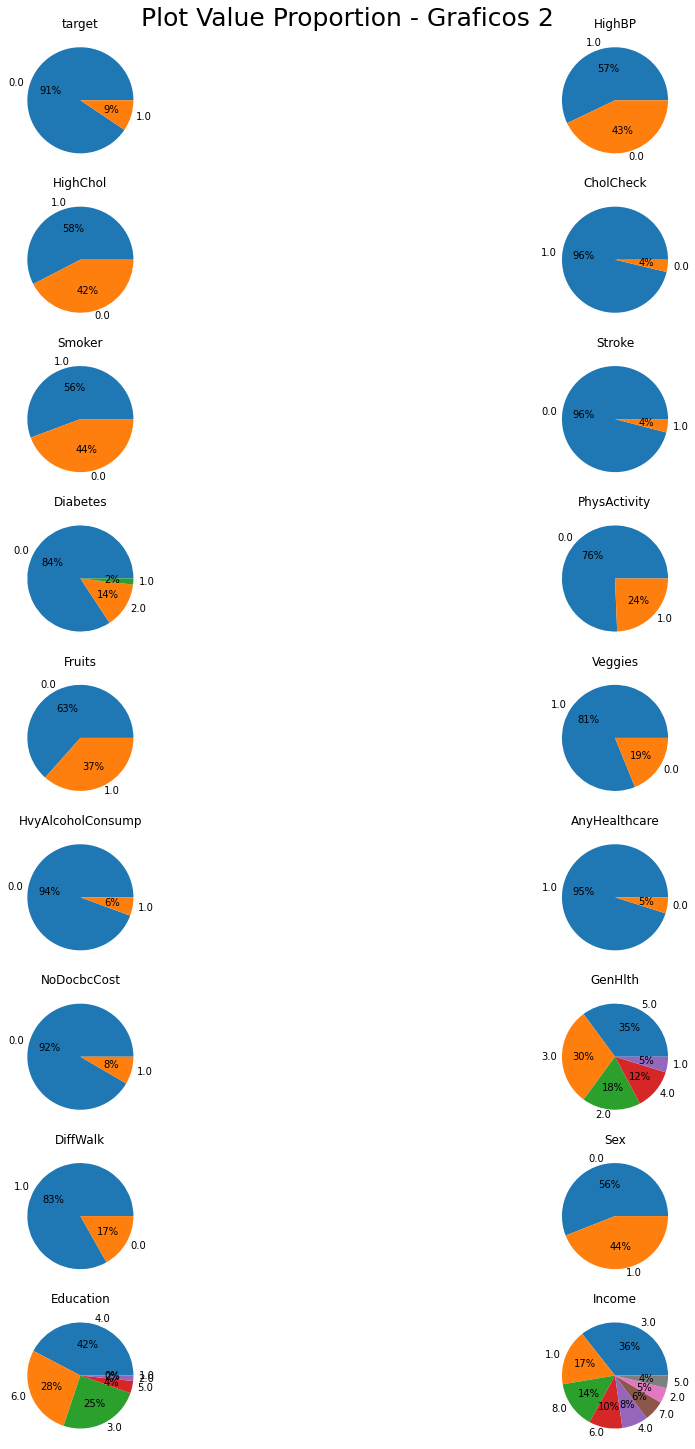

In [9]:
plt.figure(figsize=(15,40))
for i,column in enumerate(features):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Plot Value Proportion - Graficos 2", fontsize=25, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

Observando - "Graficos 2" podemos ver de forma mas clara las diferencias.
Se puede notar que en la variable target la gran mayoria (91%) se refieren a situaciones en donde no se presentan problemas al corazón.
En las muestras no se ve un problema importante de derrames (4% postivo), gran consumo de alcohol (6% positivo) o problemas al caminar (17% positivo).
Ademas, la mitad de la prueba aproximadamente presentó:

1-Alto colesterol (58%).

2-Alta presion en sangre (43%).

3-Fumadores (56%).

4-Sexo masculino (56%).

***
# Tercer analisis de datos
***

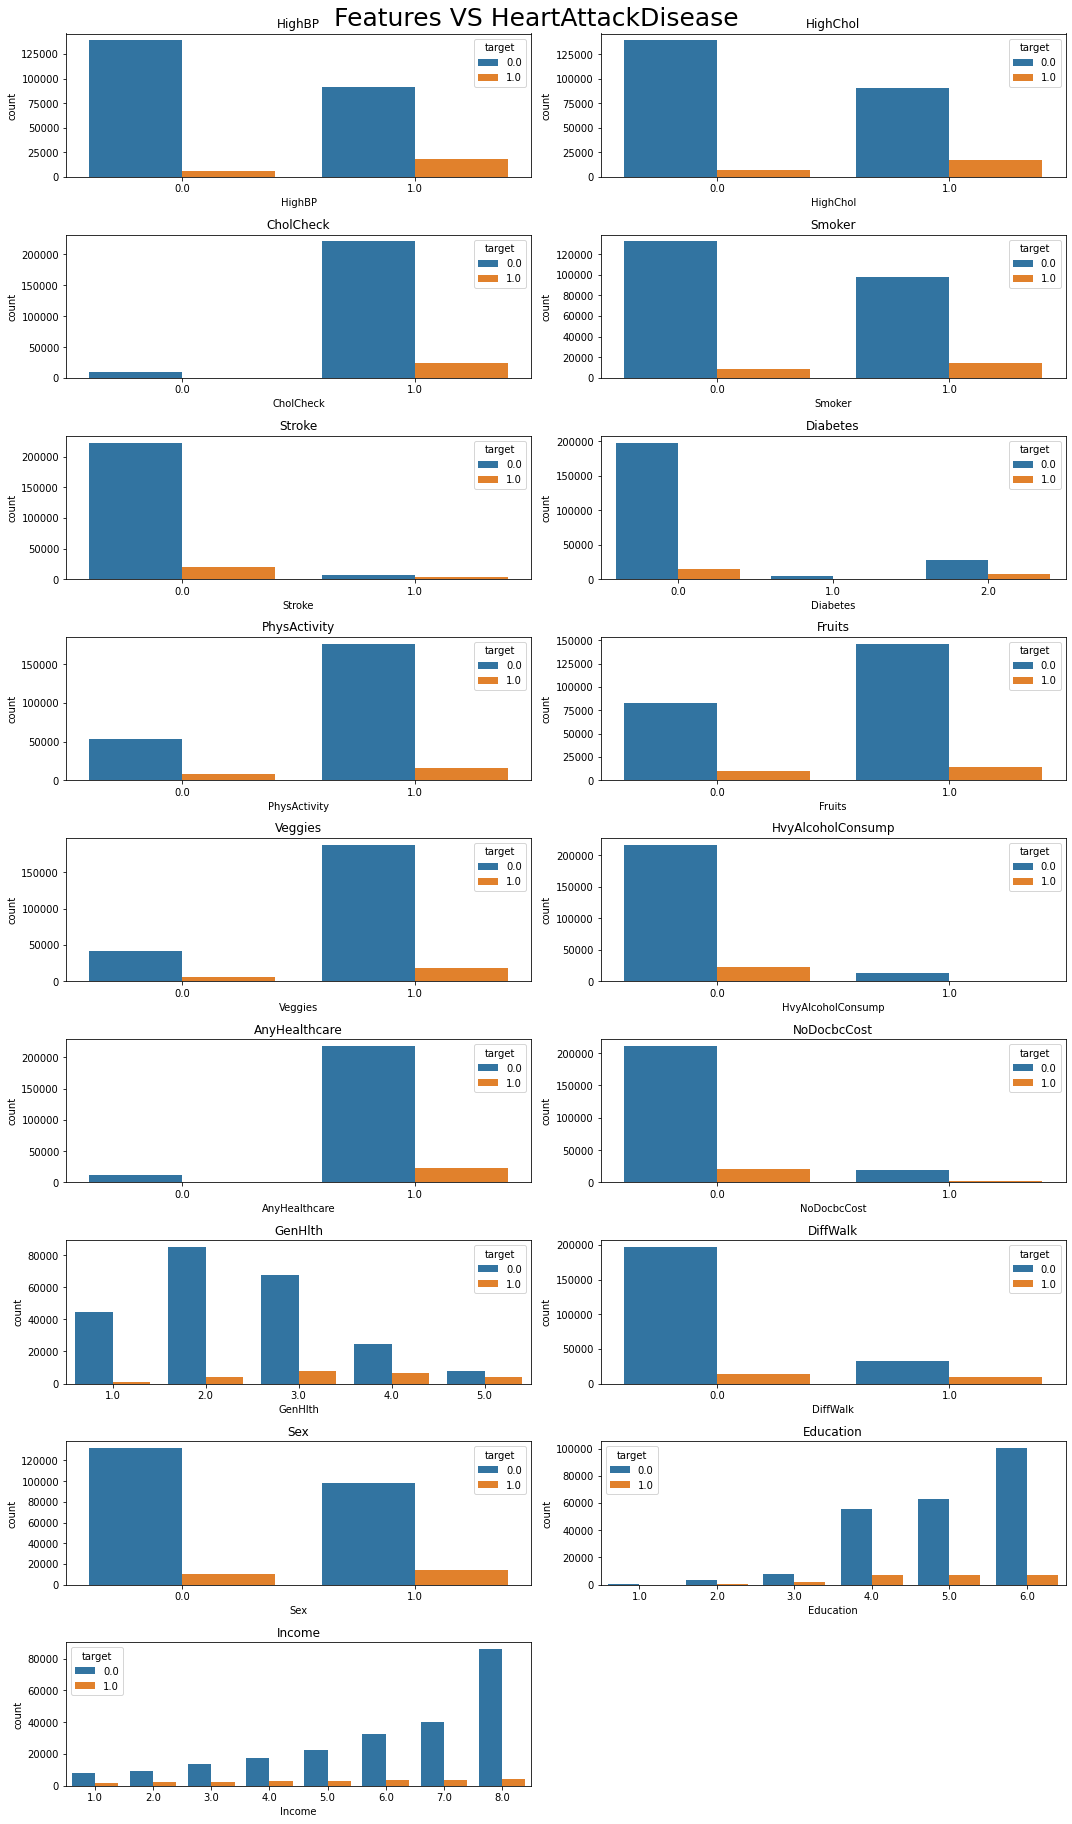

In [10]:
# sns.countplot(x='feature', data=df, hue='target')
plt.figure(figsize=(15,50))
for i,column in enumerate(features[1:]):
    plt.subplot(len(features), 2, i+1)
    plt.suptitle("Features VS HeartAttackDisease", fontsize=25, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='target')
    plt.title(f"{column}")
    plt.tight_layout()

Enfrentando las features con nuestro target se puede observar una clara relacion entre la actividad fisica y los derrames con la presencia de problemas en el corazón.

***
# Cuarto analisis de datos
***

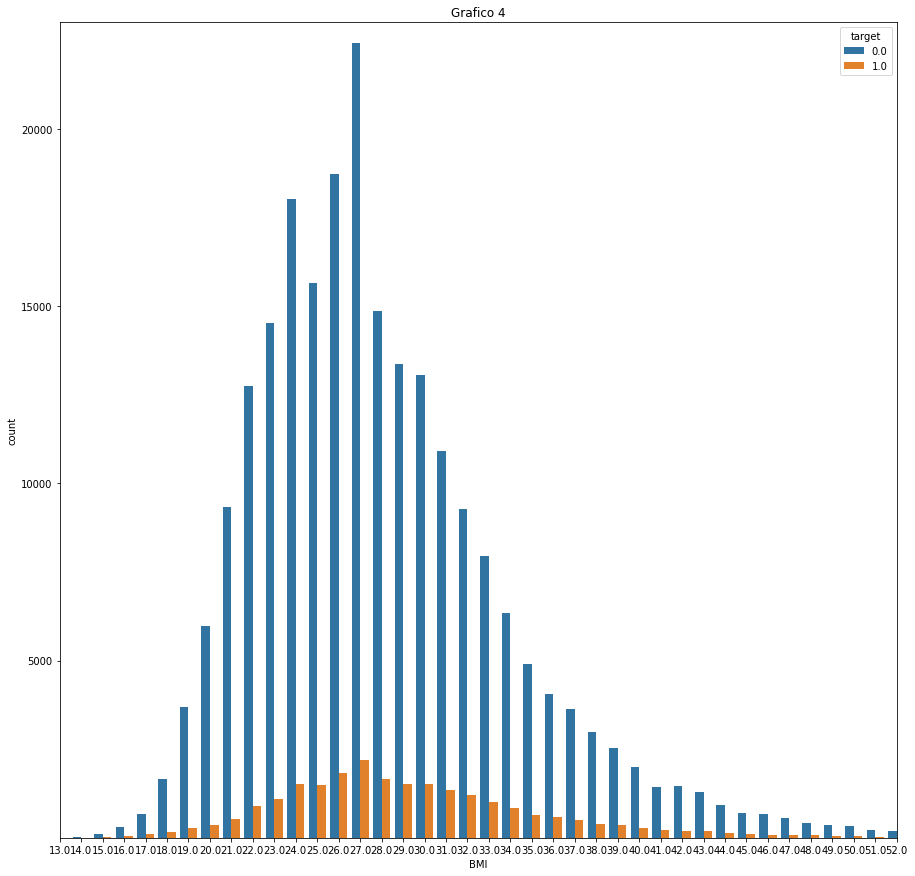

<Figure size 180000x180000 with 0 Axes>

In [74]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(x='BMI', data=df, hue='target', ax=ax).set(title='Grafico 4')
ax.set_xlim(1, 40)
ax.set_ylim(1, 23000)
plt.figure(figsize=(2500,2500))
plt.show()

Al observar - "Grafico 4" podemos ver una leve correlación entre el indice de masa corporal y la presencia de problemas en el corazón.

***
# Quinto analisis de datos
***

Text(0.5, 1.0, 'Correlation Between Features - Grafico 4')

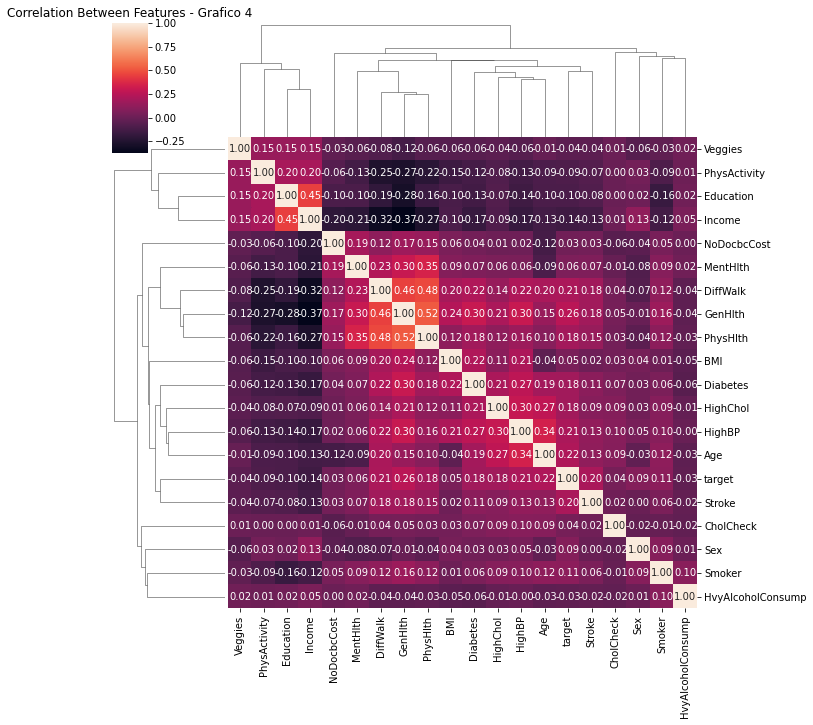

In [76]:
# Primero probamos con un threshold bajo para visualizar la correlacion de la mayoria de features
corr_matrix = df.corr()
threshold = 0.025
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features - Grafico 4")

Al visualizar - "Grafico 4" nos encontramos con una matriz de relacion simétrica por lo que con analizar la parte superior o inferior a la diagonal principal es suficiente para sacar algunas conclusiones.


1-DiffWalk, dificultades al caminar, tiene una correlacion fuerte con GenHlth, salud general (0.46) y PhysHlth, salud física (0.48) asi como GenHlth con PhysHlth (0.52).

2-La feature Income, ingresos, parece ser poco util debido a que no tiene correlacion con las demás features. Podría ser una opcion el de quitarlo del dataframe.

3-Nuestro target esta poco correlacionado con BMI, indice de masa corporal (0.05), MenHlth (0.06) y NoDocbcCost (0.03).

4-Nuestro target no esta correlacionado con Income (-0.14), Education (-0.1), Veggies (-0.04) y PhysActivity (-0.09).


***
# Sexto analisis de datos
***

Text(0.5, 1.0, 'Correlation Between Features - Grafico 5')

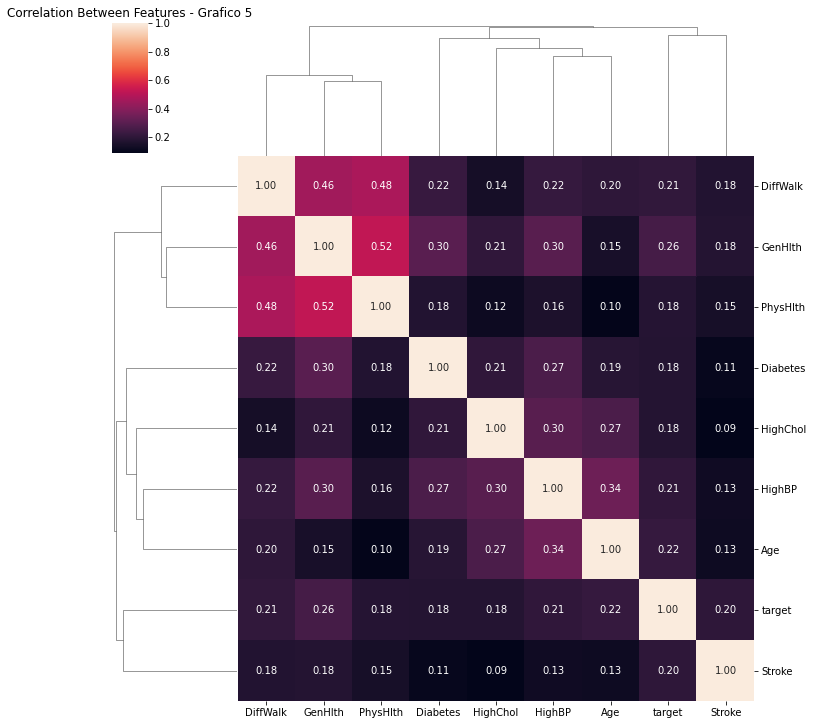

In [13]:
# Ahora probamos con un threshold mayor para visualizar las features que mas afectan a nuestra predicción
corr_matrix = df.corr()
threshold = 0.15
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features - Grafico 5")

Otra conclusión que podemos sacar de - "Graficos 5" es que:

5-Nuestro target esta mayormente correlacionada con GenHlth (0.26), DiffWalk (0.21), Age (0.22) y HighBP (0.21).

***
# Sexto analisis
***

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b2c1e5580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b2c1e5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b2c1e58e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b2c1e4580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b2c1e4850>],
 'means': []}

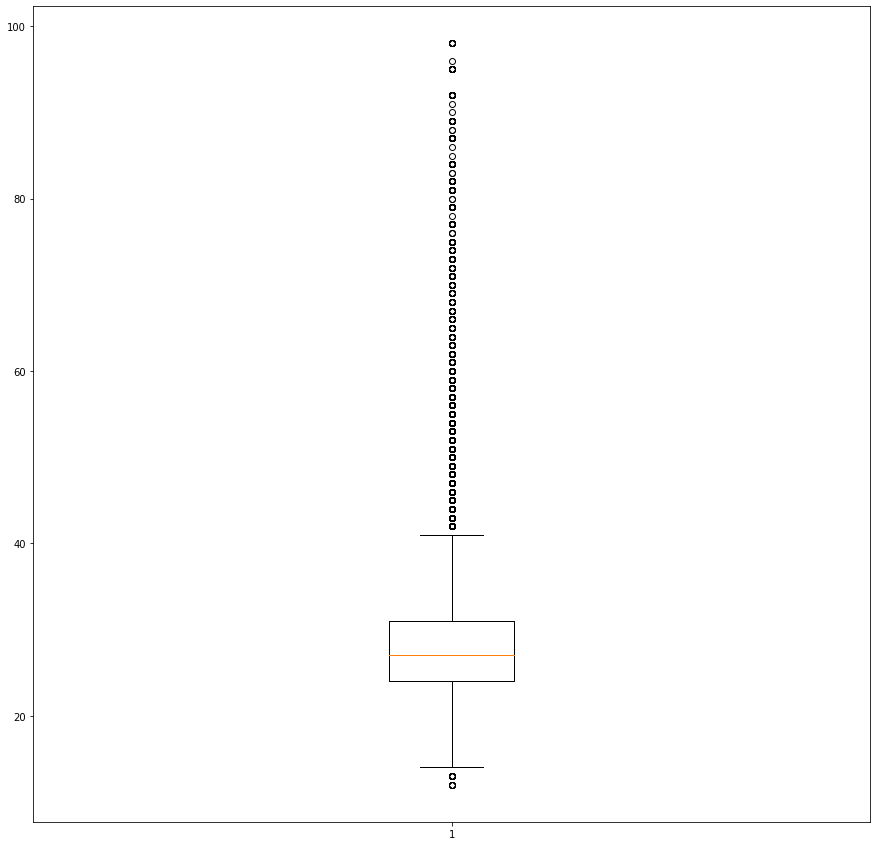

In [77]:
fig, ax = plt.subplots(figsize=(15,15))
plt.boxplot(df['BMI'])

Como se puede observar, la mediana de BMI es de 25 unidades. Pese a que este valor es optimo se puede observar la presencia de muchos valores fuera de la caja.

***
# Objetivo
***

¿Cómo podemos prevenir la ocurrencia de un accidente cerebrovascular?

¿Podemos detectar patrones entre distintas poblaciones con distintas caracterisicas en la ocurrencia de un accidentes cerebrovasculares?

***
# Contexto Comercial
***

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la 2ª causa principal de muerte a nivel mundial, responsable de aproximadamente el 11% del total de muertes. Más de 877,500 estadounidenses mueren de enfermedades cardíacas, accidentes cerebrovasculares y otras enfermedades cardiovasculares cada año.La OMS nos ha contratado para descubrir cuales son las principales fuentes de estos accidentes con el objetivo de implementar cambios en la sociedad y asi reducir su ocurrencia a lo largo de los años.

***
# Problema Comercial 
***

Se creará un atlas interactivo de enfermedades cardíacas y accidentes cerebrovasculares en donde:
*   Los usuarios pueden ver mapas a nivel de condado de enfermedades cardíacas y accidentes cerebrovasculares por sexo / grupo étnico, junto con mapas de condiciones socioambientales y servicios de salud, para todo Estados Unidos o para un estado o territorio elegido.

Se creará un mapa nacional para la visualización de los accidentes cerebrovasculares en donde:
*   Se muestran las muertes y hospitalizaciones relacionadas con el accidente cerebrovascular disponibles por sexo y grupo étnico. Cada mapa contiene un enlace para ver una versión más grande en formato PDF.


***
# Contexto analitico
***

Mediante la manipulación de los datos disponibles y las visualizaciones que mostraremos se buscará responder a:
*   ¿Cómo la presencia de una ábitos saludables y una alimentacion adecuada afectan a la ocurrencia de accidentes cerebrovasculares?
*   ¿Cómo afecta el sexo en la ocurrencia de accidentes cerebrovascucares?
*   Luego de presentar un accidente cerebrovascular, ¿Se presentan problemas en el corazón?
*   ¿Hay más accidentes entre un grupo étnico determinado?

***
# Exploratory Data Analysis (EDA)
***

Características categóricas :
*   Género : Femenino > Masculino
*   Hipertensión: sin hipertensión > hipertensión
*   heart_disease : sin enfermedad cardíaca > enfermedad cardíaca
*   ever_married : casado > no casado
*   working_type : particulares > autónomos > govt job > niños
*   Residence_type : Urbano > Rural
*   smoking_status : nunca ha fumado > anteriormente ha fumado > fumador

Características discretas (presencia de accidentes cerebrovasculares) :
*   Edad : 55 - 80
*   avg_glucose_level : 80 - 200
*   IMC : 20 - 40